In [1]:
import json
import mmcv
import matplotlib.pyplot as plt
from mmocr.datasets.pipelines.crop import crop_img

jsonl_file = ['train.jsonl', 'val.jsonl', 'test_cls.jsonl']

## Convert to LineStrParse (Recognition)

In [1]:
def line_str_parse_file(input_file):
    new_dir = f"line_str_parse/{input_file.replace('.jsonl', '')}"
    img_dir = new_dir + '/images'
    mmcv.mkdir_or_exist(new_dir)
    mmcv.mkdir_or_exist(img_dir)
    f = open(input_file)
    gt_list = []
    for inputz in f:
        line = json.loads(inputz)
        img = mmcv.imread(f'../images/{line["file_name"]}')
        num_of_label = 0
        for _ in line['annotations']:
            for ann in _:
                poly, text = ann['polygon'], ann['text']
                compressed_poly = []
                for item in poly:
                    compressed_poly.append(item[0])
                    compressed_poly.append(item[1])
                out = crop_img(img, compressed_poly)
                cropped_file_name = f'{line["file_name"].strip(".jpg")}_{num_of_label}.jpg'
                mmcv.imwrite(out, f"{img_dir}/{cropped_file_name}")
                num_of_label += 1
                gt_list.append(f'{cropped_file_name} {text}' + "\n")

    f = open(f'{new_dir}/labels.txt', 'w')
    f.writelines(gt_list)
    f.close()
    print ('done')
    return

line_str_parse_file(jsonl_file[0]) 

done


In [62]:
# testing of the label
label_f = open('line_str_parse/val/label.txt')
#label_f = open('/mmocr/tests/data/ocr_toy_dataset/label.txt')
for line in label_f:
    x = line

In [63]:
x

'3045638_11.jpg 劲\n'

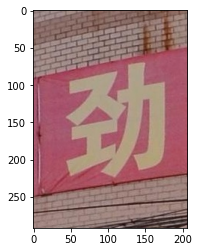

In [65]:
sample_img = mmcv.imread('line_str_parse/val/images/3045638_11.jpg')
plt.imshow(mmcv.bgr2rgb(sample_img))

In [12]:
import json
from collections import defaultdict
f = open('val.jsonl')
attribute_counter = defaultdict(lambda: 0)
ann_counter = 0
for inputz in f:
    line = json.loads(inputz)
    for _ in line['annotations']:
        for ann in _:
            ann_counter += 1
            for item in ann['attributes']:
                attribute_counter[item] +=1

In [17]:
print (f"attributes of annotations: {dict(attribute_counter)}")
print (f"total annotations: {ann_counter}")

attributes of annotations: {'distorted': 16115, 'raised': 15741, 'occluded': 8250, 'wordart': 4587, 'bgcomplex': 12454, 'handwritten': 192}
total annotations: 53884


## Convert to LineJsonParser (Detection)

In [2]:
def line_json_parse_file(input_file):
    new_dir = f"line_json_parse/{input_file.replace('.jsonl', '')}"
    mmcv.mkdir_or_exist(new_dir)
    f = open(input_file)
    gt_lines = []
    for inputz in f:
        line = json.loads(inputz)
        merged_annotations = []
        for _ in line['annotations']:
            for ann in _:
                compressed_poly = []
                for item in ann['polygon']:
                    compressed_poly.append(item[0])
                    compressed_poly.append(item[1])
                ann['segmentation'] = [compressed_poly]
                ann['category_id'] = 1
                ann['bbox'] = ann['adjusted_bbox']
                merged_annotations.append(ann)
        line['annotations'] = merged_annotations
        gt_lines.append(json.dumps(line)+'\n')
    
    f = open(f'{new_dir}/labels.txt', 'w')
    f.writelines(gt_lines)
    f.close()
    print ('done')
    return

line_json_parse_file(jsonl_file[0]) 

done


In [3]:
f = open('line_json_parse/train/labels.txt')
for item in f:
    x = json.loads(item)
    break

In [4]:
x

{'annotations': [{'adjusted_bbox': [140.26028096262758,
    897.1957001682758,
    22.167573140645146,
    38.36424196832945],
   'attributes': ['distorted', 'raised'],
   'is_chinese': True,
   'polygon': [[140.26028096262758, 896.7550603352049],
    [162.42785410327272, 898.0769798344178],
    [162.42785410327272, 935.7929346470926],
    [140.26028096262758, 935.0939571156308]],
   'text': '明',
   'segmentation': [[140.26028096262758,
     896.7550603352049,
     162.42785410327272,
     898.0769798344178,
     162.42785410327272,
     935.7929346470926,
     140.26028096262758,
     935.0939571156308]],
   'category_id': 1,
   'bbox': [140.26028096262758,
    897.1957001682758,
    22.167573140645146,
    38.36424196832945]},
  {'adjusted_bbox': [162.42785410327272,
    898.5416545674744,
    23.376713493771263,
    37.74268246537315],
   'attributes': ['distorted', 'raised'],
   'is_chinese': True,
   'polygon': [[162.42785410327272, 898.0769798344178],
    [185.80456759704398, 899